ETF Mean Return: 6.27%
ETF Standard Deviation: 4.36%
Market Mean Return: 11.02%
Market Standard Deviation: 14.82%

Number of years ETF beats the market: 2353 out of 10000
Percentage of years ETF beats the market: 23.53%

Number of years ETF return is less than 5%: 3694 out of 10000
Percentage of years ETF return is less than 5%: 36.94%


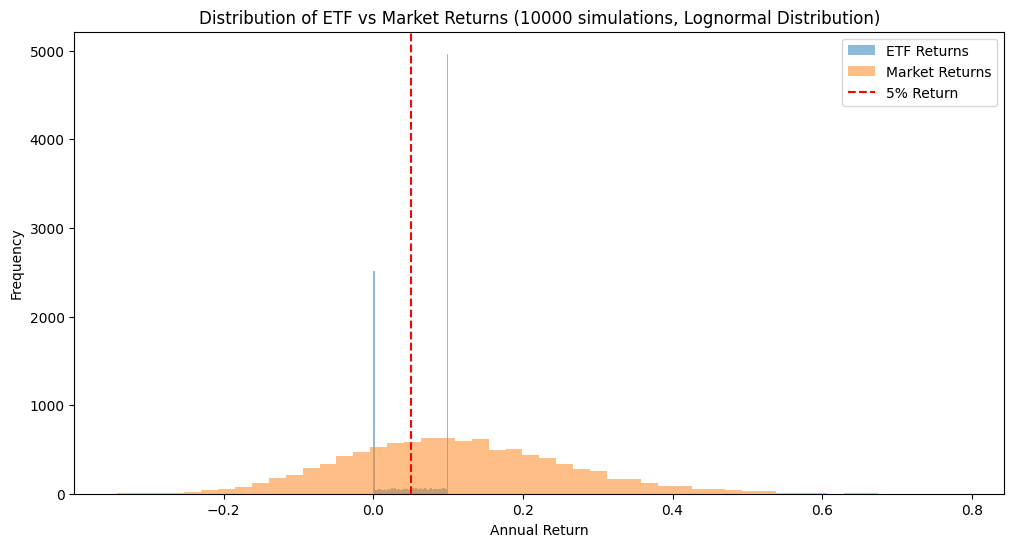

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simulate_lognormal_returns(num_simulations, annual_return, annual_volatility):
    # Calculate mu and sigma for the lognormal distribution
    mu = np.log(1 + annual_return) - 0.5 * np.log(1 + (annual_volatility**2 / (1 + annual_return)**2))
    sigma = np.sqrt(np.log(1 + (annual_volatility**2 / (1 + annual_return)**2)))
    
    # Generate lognormal returns
    returns = np.random.lognormal(mu, sigma, num_simulations) - 1
    return returns

def simulate_etf_returns(num_simulations, annual_return, annual_volatility, fee, cap, floor):
    market_returns = simulate_lognormal_returns(num_simulations, annual_return, annual_volatility)
    etf_returns = np.clip(market_returns - fee, floor, cap)
    return etf_returns, market_returns

# Set parameters
num_simulations = 10000  # Increased for better statistical significance
annual_return = 0.11
annual_volatility = 0.15
fee = 0.005
cap = 0.10
floor = 0.00

# Run simulations
etf_returns, market_returns = simulate_etf_returns(num_simulations, annual_return, annual_volatility, fee, cap, floor)

# Calculate statistics
etf_mean = np.mean(etf_returns)
etf_std = np.std(etf_returns)
market_mean = np.mean(market_returns)
market_std = np.std(market_returns)

print(f"ETF Mean Return: {etf_mean:.2%}")
print(f"ETF Standard Deviation: {etf_std:.2%}")
print(f"Market Mean Return: {market_mean:.2%}")
print(f"Market Standard Deviation: {market_std:.2%}")

# Calculate relative performance
relative_performance = etf_returns - market_returns
etf_outperformance = np.sum(relative_performance > 0)

print(f"\nNumber of years ETF beats the market: {etf_outperformance} out of {num_simulations}")
print(f"Percentage of years ETF beats the market: {etf_outperformance/num_simulations:.2%}")

# Count number of years ETF return is less than 5%
etf_below_5_percent = np.sum(etf_returns < 0.05)
print(f"\nNumber of years ETF return is less than 5%: {etf_below_5_percent} out of {num_simulations}")
print(f"Percentage of years ETF return is less than 5%: {etf_below_5_percent/num_simulations:.2%}")

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(etf_returns, bins=50, alpha=0.5, label='ETF Returns')
plt.hist(market_returns, bins=50, alpha=0.5, label='Market Returns')
plt.axvline(x=0.05, color='r', linestyle='--', label='5% Return')
plt.xlabel('Annual Return')
plt.ylabel('Frequency')
plt.title('Distribution of ETF vs Market Returns (10000 simulations, Lognormal Distribution)')
plt.legend()
plt.show()